In [18]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [19]:
#read in the data
df = pd.read_csv("5_29_25_round_2_agonist_as_antagonist_screen.csv", index_col=0)  # Set the first column as row index

In [20]:
df

,OxA,DMSO,d64,d65,d66,d67,d68,d69,d70,d71,...,d77,d78,d79,d80,d81,d82,d83,d84,d85,d86
Replicate 1,0.700662,0.073832,1.015009,1.048942,1.262981,0.902396,0.391535,0.369162,0.591778,0.823716,...,0.230074,0.453062,0.979957,0.588049,0.143190,0.254684,0.390417,0.225226,0.590286,0.462012
Replicate 2,1.613499,0.085019,0.462758,1.106740,0.825207,0.894565,0.796868,0.602592,0.766291,0.816631,...,0.247972,0.442994,0.847208,0.600727,0.242752,0.288618,0.390044,0.202107,0.542556,0.573879
Replicate 3,0.705137,0.066002,1.045959,1.059383,1.048942,0.697679,0.668220,0.689102,0.685000,0.848327,...,0.045493,0.470588,0.664864,0.461639,0.367670,0.428824,0.372145,0.032442,0.637643,0.080917
Replicate 4,0.980703,0.052205,0.378111,1.066468,0.715578,0.467232,0.775613,0.798732,0.607439,0.705137,...,0.260278,0.415028,0.616389,0.610049,0.041764,0.372891,0.247972,0.243125,0.465741,0.019390
Average,1.000000,0.069264,0.725459,1.070383,0.963177,0.740468,0.658059,0.614897,0.662627,0.798453,...,0.195954,0.445418,0.777105,0.565116,0.198844,0.336254,0.350144,0.175725,0.559057,0.284050


In [22]:
# Get the divisor: OxA at "average" row
divisor = df.loc["Average", "OxA"]

# Divide the entire DataFrame by that value
df_normalized = df / divisor

#set df_normalized to df
df = df_normalized

In [23]:
#get mean and std dev
column_means = df.mean(axis=0)  # Mean of each column
column_stds = df.std(axis=0)    # Standard deviation of each column

/tmp/ipykernel_1274250/879362608.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


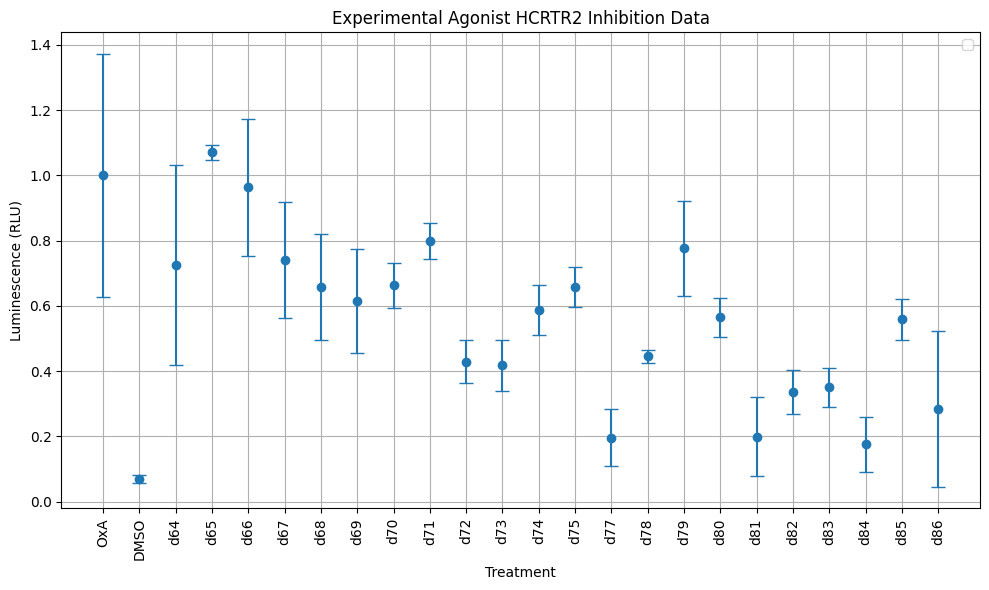

In [24]:
#make plot


plt.figure(figsize=(10, 6))
plt.errorbar(column_means.index, column_means, yerr=column_stds, fmt='o', capsize=5)

# Customizing the plot
plt.title('Experimental Agonist HCRTR2 Inhibition Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
drug_data = df.transpose()
# Drop the row for the drug named "Suvorexant"
#drug_data = drug_data.drop("Suvorexant", axis=0)
drug_data

,Replicate 1,Replicate 2,Replicate 3,Replicate 4,Average
OxA,0.700662,1.613499,0.705137,0.980703,1.000000
DMSO,0.073832,0.085019,0.066002,0.052205,0.069264
d64,1.015009,0.462758,1.045959,0.378111,0.725459
d65,1.048942,1.106740,1.059383,1.066468,1.070383
d66,1.262981,0.825207,1.048942,0.715578,0.963177
d67,0.902396,0.894565,0.697679,0.467232,0.740468
d68,0.391535,0.796868,0.668220,0.775613,0.658059
d69,0.369162,0.602592,0.689102,0.798732,0.614897
d70,0.591778,0.766291,0.685000,0.607439,0.662627
d71,0.823716,0.816631,0.848327,0.705137,0.798453


/tmp/ipykernel_1274250/2624801057.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color=color
/tmp/ipykernel_1274250/2624801057.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"


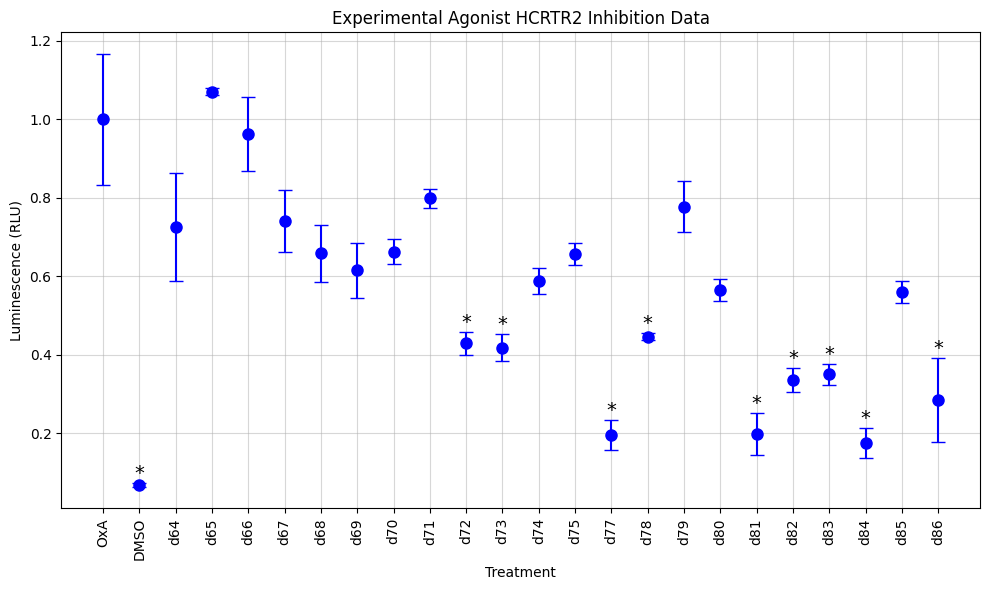

In [27]:
# Extract drug names from the index (row headers)
drug_names = drug_data.index  # Drug names are now the row index
replicates = drug_data  # Replicates are the rest of the data (without the row names)

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows for each drug)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows for each drug)

# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is now the first row in the data (first index)
first_drug_values = replicates.iloc[0, :]  # First drug's replicates

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i, :]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)

# Step 4: Plot the data with error bars
plt.figure(figsize=(10, 6))

# Specify a color for all data points (e.g., 'blue')
color = 'blue'

# Plot the drugs with error bars and set all data points to the same color
for i, drug in enumerate(drug_names):
    plt.errorbar(
        [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color=color
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

# Customize the plot
plt.title('Experimental Agonist HCRTR2 Inhibition Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()